In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os

import warnings
warnings.filterwarnings('ignore')

In [64]:
import numpy as np

In [67]:
A = np.random.randn(4,3)
A

array([[ 1.55576539, -2.10776233,  1.47915262],
       [-1.46697584,  1.6638187 ,  1.64921017],
       [ 0.05667918, -1.73471143, -0.43742504],
       [ 2.31497299, -0.32268655,  0.95634771]])

In [68]:
np.sum(A, axis = 1, keepdims = True).shape

(4, 1)

In [ ]:
pd.read_parquet('Data/train_all_slopes.parquet').shape

In [78]:
(80370+79638+79850+79508+79968)/5

79866.8

In [76]:
fold = 4
path = 'models_DART_corr_pcaslope_lag/'
for fname in os.listdir(path):
            if fname.startswith("fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                model.save_model(path + 'cp_{}_model.txt'.format(fold))

fold_4_iter_10682_score_0.79965.pkl


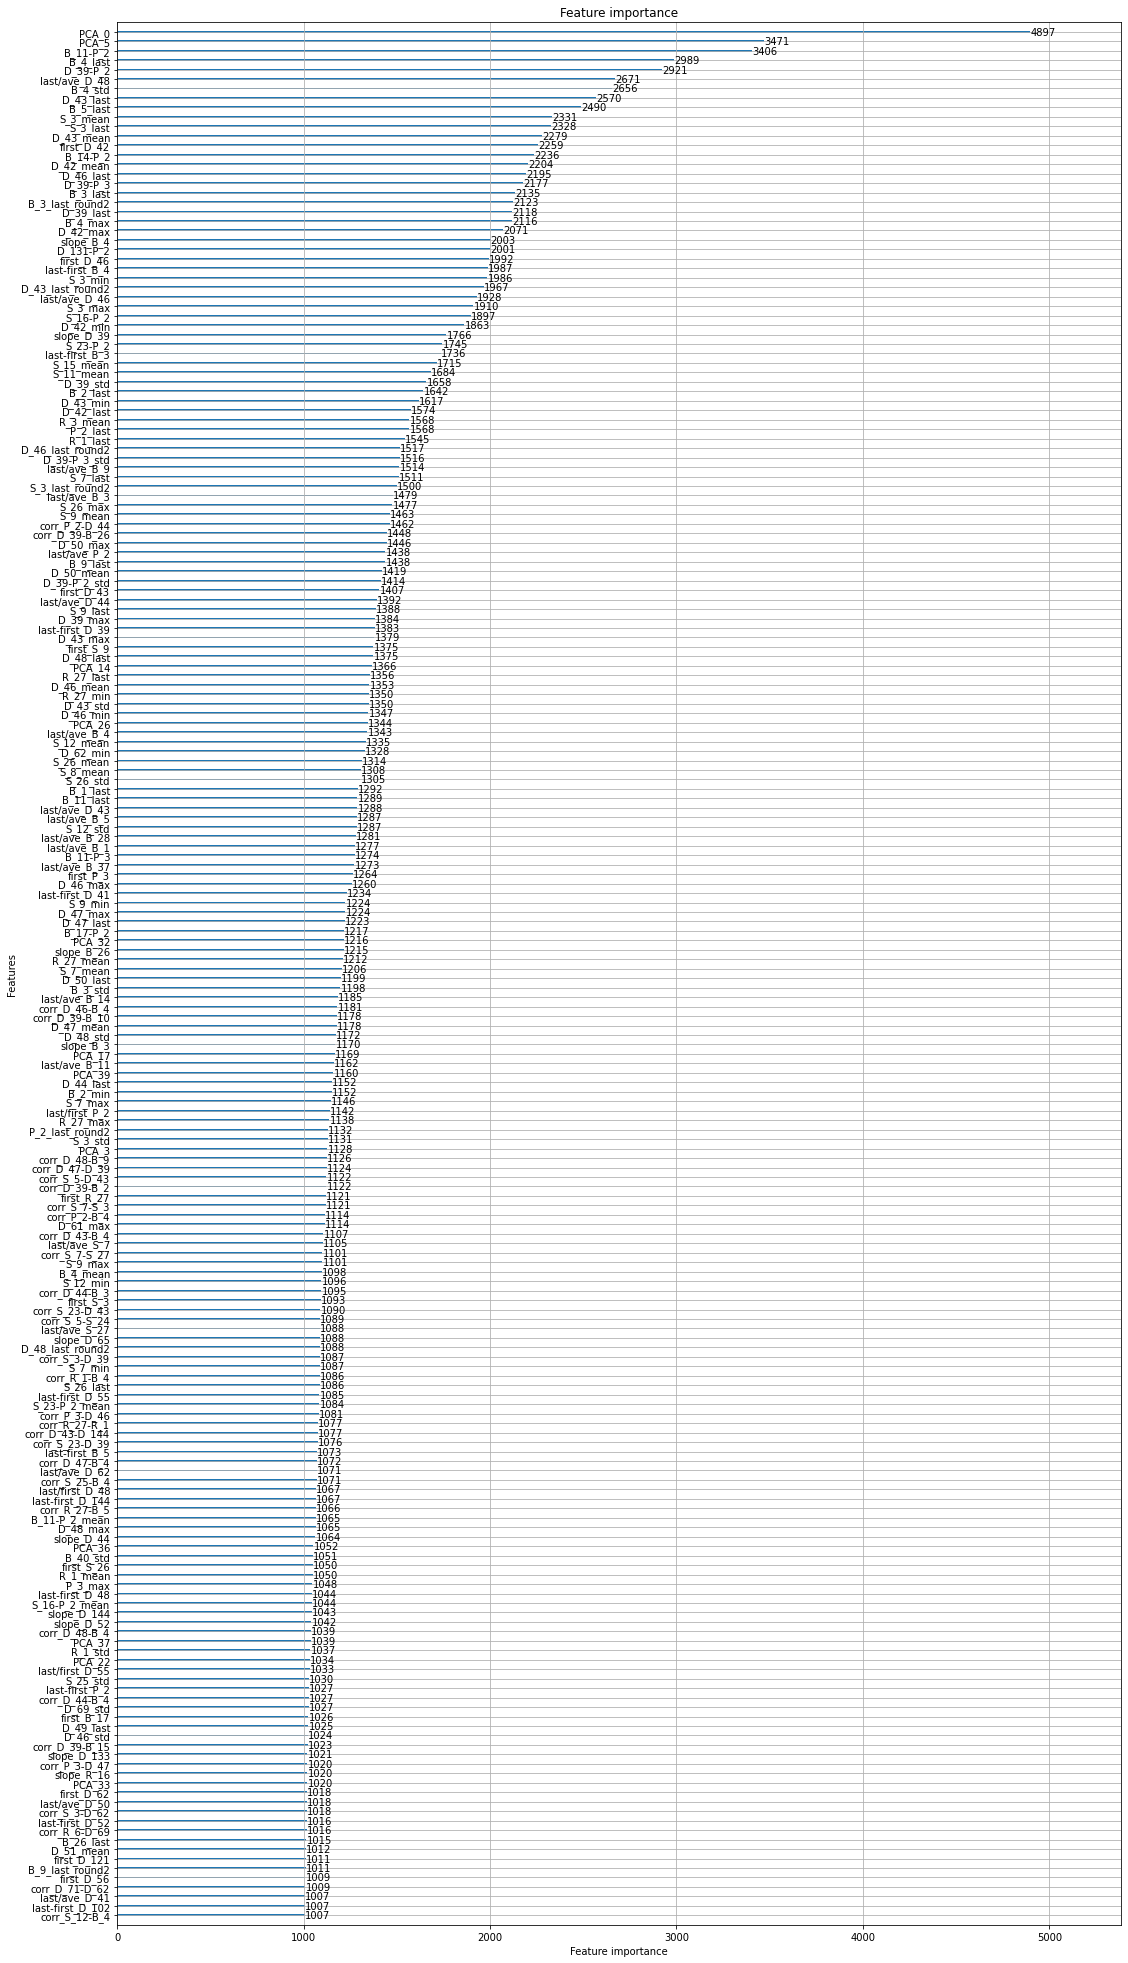

In [28]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [29]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [37]:
df.head(50)

,index,importance
0,PCA_0,4897
1,PCA_5,3471
2,B_11-P_2,3406
3,B_4_last,2989
4,D_39-P_2,2921
5,last/ave_D_48,2671
6,B_4_std,2656
7,D_43_last,2570
8,B_5_last,2490
9,S_3_mean,2331


In [30]:
df[df.importance == 0]

,index,importance
1879,first_D_93,0
1880,first_D_87,0
1881,D_138_min,0
1882,D_137_min,0
1883,first_R_28,0
...,...,...
2033,D_109_mean,0
2034,D_109_std,0
2035,D_109_min,0
2036,D_109_max,0


In [35]:
df[df['index'].str.startswith('lag_')]


,index,importance


In [31]:
df[df['index'].str.startswith('slope_')]

,index,importance
22,slope_B_4,2003
32,slope_D_39,1766
97,slope_B_26,1215
107,slope_B_3,1170
137,slope_D_65,1088
...,...,...
1989,slope_D_94,0
1990,slope_R_23,0
1993,slope_D_88,0
1994,slope_R_18,0


In [32]:
df[df['index'].str.startswith('PCA_')]

,index,importance
0,PCA_0,4897
1,PCA_5,3471
67,PCA_14,1366
73,PCA_26,1344
96,PCA_32,1216
108,PCA_17,1169
110,PCA_39,1160
118,PCA_3,1128
160,PCA_36,1052
169,PCA_37,1039


In [33]:
df[df['index'].str.startswith('corr_')]

,index,importance
52,corr_P_2-D_44,1462
53,corr_D_39-B_26,1448
103,corr_D_46-B_4,1181
105,corr_D_39-B_10,1178
119,corr_D_48-B_9,1126
120,corr_D_47-D_39,1124
121,corr_D_39-B_2,1122
122,corr_S_5-D_43,1122
124,corr_S_7-S_3,1121
125,corr_P_2-B_4,1114


In [ ]:
score = pd.read_csv('Data/corr_importance.csv')

In [ ]:
score.sort_values(by='score_first', ascending=False, inplace=True)

In [ ]:
top_corr = score['first'].unique()[:10]
top_corr

In [ ]:
for i in range(0,10):
    print(top_corr[i], end=', ')
    score_first = score[score['first'] == top_corr[i]].sort_values(by='corr', ascending=False)
    high_corr_list = score_first[score_first['corr'] > 0.5]['name'].to_list()
    print(set(top_corr).intersection(set(high_corr_list)))

In [ ]:
len(['corr_D_39-B_26', 'corr_D_48-B_4', 'corr_P_2-D_44',
       'corr_D_47-B_4', 'corr_D_47-D_39', 'corr_P_2-B_4',
       'corr_D_39-B_10', 'corr_D_44-B_4', 'corr_D_39-B_2',
       'corr_D_46-B_4', 'corr_D_48-D_47', 'corr_D_48-B_3',
       'corr_D_48-B_9', 'corr_S_5-S_24', 'corr_S_7-S_3',
       'corr_D_43-D_144', 'corr_D_48-D_39', 'corr_D_44-B_3',
       'corr_P_3-D_46', 'corr_S_5-D_43', 'corr_R_1-B_4', 
       'corr_P_3-D_47', 'corr_D_39-B_3', 'corr_R_6-D_39', 'corr_S_27-B_2',
       'corr_S_23-D_43', 'corr_R_6-D_69', 'corr_P_2-D_48',
       'corr_S_25-B_4', 'corr_D_43-B_4', 'corr_R_27-D_69',
       'corr_S_7-S_27', 'corr_D_39-B_11', 'corr_S_3-D_39',
       'corr_D_39-B_1', 'corr_S_12-B_4', 'corr_D_39-B_15',
       'corr_R_27-B_26', 'corr_S_23-D_39', 'corr_R_27-R_1',
       'corr_R_1-D_39', 'corr_S_19-D_39', 'corr_S_27-B_3',
       'corr_S_16-D_39', 'corr_R_27-B_5',
       'corr_S_3-D_62', 'corr_D_71-D_62', 'corr_R_27-D_39'])